# Youtube Analysis
## Goals: Prepare a Report and a Power BI Dashboard

### Report

+ Should contain details about Youtube
+ Should contain details about Top 5 Youtubers
+ Should contain detialed analysis, visuals, specific pictures et al.
+ Should answer all the specified 10 questions (and more). 
+ Should give details on Engagement Rate, Views Average and similar terminologies
+ Should give reference to Kaggle Datasource

### Dashboard

+ Should be done using PowerBI
+ Should contain only visuals and cards
+ Should answer all the questions

## Questions to answer

+ Which country has the highest top Youtubers
+ Which youtuber has the highest number of likes
+ Which youtuber has the highest number of views
+ Which youtuber has the hgihest number of followers
+ Is there a relationship between number of followers and number of views
+ What is the Views Average for the top 10 Youtubers (Bar Chart - Google what views average means)
+ Which Main Video Category is the most popular among the top youtubers
+ Relationship between engagement and views
+ Youtuber with the highest engagment rate
+ What is the most popular youtube content topic

## Terminologies

+ What is Engagement Rate?
+ What is Views Average?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("top_200_youtubers.csv")

In [3]:
data.head()

,Country,Channel Name,Category,Main Video Category,username,followers,Main topic,More topics,Likes,Boost Index,...,Views,Views Avg.,Avg. 1 Day,Avg. 3 Day,Avg. 7 Day,Avg. 14 Day,Avg. 30 day,Avg. 60 day,Comments Avg,Youtube Link
0,IN,T-Series,Gaming & Apps,Music,T-Series,220000000,Music of Asia,"Entertainment,Music of Asia,Music,Movies",1.602680e+09,83,...,195660744416,2.095329e+06,1.522448e+05,2134569.625,1.809830e+06,2.306178e+06,1.676330e+06,2.295416e+06,4493.984146,UCq-Fj5jknLsUf-MWSy4_brA
1,US,ABCkidTV - Nursery Rhymes,Gaming & Apps,Education,ABCkidTV - Nursery Rhymes,138000000,Movies,"Entertainment,Music,Movies",2.209901e+08,63,...,133025325473,7.027126e+07,1.837916e+06,1837916.000,4.891832e+06,7.052576e+06,1.265433e+07,1.572284e+07,146.700252,UCbCmjCuTUZos6Inko4u57UQ
2,IN,SET India,Gaming & Apps,Shows,SET India,137000000,Movies,"Entertainment,TV shows,Music,Movies",1.748752e+08,79,...,121741739317,1.095729e+05,NaN,586040.000,2.801276e+05,3.437881e+05,3.536019e+05,3.220336e+05,76.244316,UCpEhnqL0y41EpW2TvWAHD7Q
3,US,PewDiePie,Gaming & Apps,Gaming,PewDiePie,111000000,Lifestyle,"Gaming,Action game,Lifestyle,Action-adventure ...",2.191406e+09,88,...,28424113942,7.718345e+06,NaN,NaN,3.497395e+06,3.094440e+06,3.620274e+06,4.454120e+06,35839.781347,UC-lHJZR3Gqxm24_Vd_AJ5Yw
4,US,MrBeast,Gaming & Apps,Entertainment,MrBeast,98100000,Lifestyle,"Entertainment,Lifestyle,Technology",1.731833e+09,60,...,16242634269,9.876250e+07,NaN,NaN,2.994102e+07,2.994102e+07,2.994102e+07,5.343473e+07,113432.373684,UCX6OQ3DkcsbYNE6H8uQQuVA


In [4]:
data = data.drop_duplicates(subset='Channel Name', keep='first', inplace=False, ignore_index=False)

In [5]:
data.to_csv("clean_youtube_data.csv")

In [6]:
#Which counntry has the highest number of top youtubers
data.Country.value_counts() 
#United States with 67 and India with 45

US      67
IN      45
BR       8
CA       4
IE       3
ID       3
CO       3
TH       3
KR       3
MX       3
RU       2
PH       2
AE       2
PR       2
ES       2
NO       1
NL       1
KW       1
AU       1
PK       1
GB       1
AR       1
ES\n     1
SV       1
CL       1
BY       1
SO       1
Name: Country, dtype: int64

In [7]:
#Which youtuber has the highest number of likes
data.groupby('Channel Name')['Likes'].sum().sort_values(ascending=False)
#PewDiePie

Channel Name
PewDiePie                           2.191406e+09
MrBeast                             1.731833e+09
BANGTANTV                           1.640738e+09
T-Series                            1.602680e+09
Fernanfloo                          9.374271e+08
                                        ...     
Rihanna                             1.205009e+06
Adele                               1.187550e+06
Luis Fonsi                          7.906159e+05
News                                0.000000e+00
قناة طيور الجنة | toyoraljanahtv    0.000000e+00
Name: Likes, Length: 200, dtype: float64

In [8]:
#Which youtuber has the highest number of views
data.groupby('Channel Name')['Views'].sum().sort_values(ascending=False)
#T-Series

Channel Name
T-Series                                    195660744416
ABCkidTV - Nursery Rhymes                   133025325473
SET India                                   121741739317
SAB TV                                       80431073293
Like Nastya                                  80111555805
                                                ...     
Yuya                                          2582756055
Amit Bhadana                                  2227021034
ZHC                                           2186015533
Super JoJo - Nursery Rhymes & Kids Songs       994418044
News                                                   0
Name: Views, Length: 200, dtype: int64

In [9]:
#Which youtuber has the highest number of followers
data.groupby('Channel Name')['followers'].sum().sort_values(ascending=False).index[0]
#T-Series

'T-Series'

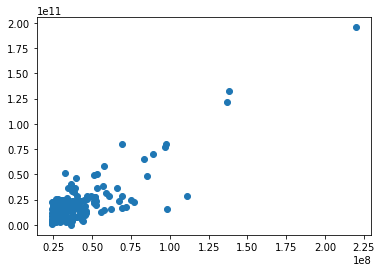

0.827280801190578

In [10]:
#Relationship between number of followers and number of views
plt.scatter(data.followers, data.Views)
plt.show()
data.followers.corr(data.Views) #High Correlation (0.827)

In [11]:
views_avg = data.groupby('Channel Name')['Views Avg.'].sum().nlargest(10)

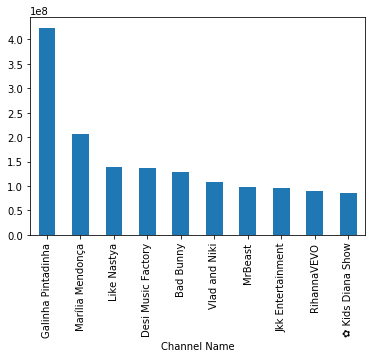

In [12]:
views_avg.plot.bar()

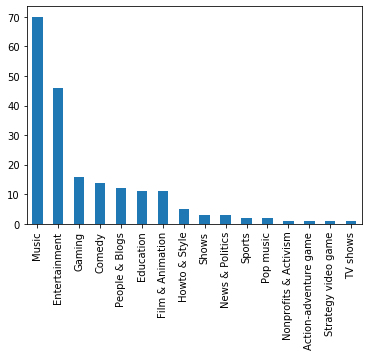

In [13]:
data['Main Video Category'].value_counts().plot.bar()

-0.03873746738188439

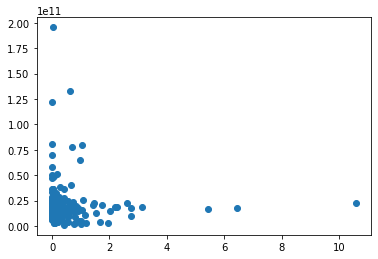

In [14]:
plt.scatter(data['Engagement Rate'], data['Views'])
data['Engagement Rate'].corr(data.Views)

In [15]:
data.groupby("Channel Name")['Engagement Rate'].sum().sort_values(ascending=False)

Channel Name
Galinha Pintadinha            10.584084
RihannaVEVO                    6.431747
Marília Mendonça               5.428497
Bounce Patrol - Kids Songs     3.123583
Desi Music Factory             2.765772
                                ...    
IndiaTV                        0.001284
SET India                      0.001206
ABP NEWS                       0.000889
TEDx Talks                     0.000261
News                           0.000000
Name: Engagement Rate, Length: 200, dtype: float64

In [16]:
data['Main topic'].value_counts()

Music                      36
Entertainment              30
Lifestyle                  27
Movies                     23
Pop music                  14
Music of Asia               8
Hip hop music               8
TV shows                    8
Technology                  6
Gaming                      6
Action game                 5
Society                     4
Electronic music            4
Hobby                       4
Music of Latin America      4
Rhythm and blues            3
Action-adventure game       2
Role-playing video game     2
Food                        1
Knowledge                   1
Strategy video game         1
Vehicles                    1
Rock music                  1
Name: Main topic, dtype: int64